# Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE


# Data Acquisition

In [2]:
# Reading data from CSV files
df = pd.read_csv("Absenteeism_at_work.csv", sep=';') 
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
# Formatting columns names to replace spaces with underscore for easier reference
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")

In [4]:
# Displaying the central tendancies for the data
df.describe(include='all')

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [5]:
# checking for null values
df.isna().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day              0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

<h1>Data Preprocessing</h1>

In [6]:
# As the absenteen hour cannot be more than 24 per day thefore removing
# The records where hour is more than 24
df = df.drop(df[df.absenteeism_time_in_hours > 24].index).reset_index(drop = True)

In [7]:
# As the data set have months till 12 therefore month 0 is invalid
# Therefore removing records for month 0
df = df.drop(df[df.month_of_absence == 0].index).reset_index(drop = True)

In [8]:
# There is no feature in the dataset which can clearly identify duplicate therefore commenting
# df = df.drop(df[df.duplicated(subset=None, keep='first')].index).reset_index(drop = True)


In [9]:
# As the dataset has a derived attribute BMI which depends on person's height and weight therefore
# We can remove the attributes height and weight
df = df.drop(['weight', 'height'], axis=1)

In [10]:
# As the data contains categorical feature due to which if wee perform the analysis directly it will be of no use
# And therefore we are performing binary encoding on the categorical columns

# For reason for seasons
df = pd.get_dummies(df, columns=['seasons'], prefix = ['season'])

# For reason_for_absence
df = pd.get_dummies(df, columns=['reason_for_absence'], prefix = ['reason_for_absence'])

# month_of_absence
df = pd.get_dummies(df, columns=['month_of_absence'], prefix = ['month_of_absence'])

# day_of_the_week
df = pd.get_dummies(df, columns=['day_of_the_week'], prefix = ['day_of_the_week'])


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 64 columns):
id                                 709 non-null int64
transportation_expense             709 non-null int64
distance_from_residence_to_work    709 non-null int64
service_time                       709 non-null int64
age                                709 non-null int64
work_load_average/day              709 non-null float64
hit_target                         709 non-null int64
disciplinary_failure               709 non-null int64
education                          709 non-null int64
son                                709 non-null int64
social_drinker                     709 non-null int64
social_smoker                      709 non-null int64
pet                                709 non-null int64
body_mass_index                    709 non-null int64
absenteeism_time_in_hours          709 non-null int64
season_1                           709 non-null uint8
season_2                     

In [11]:
#fig, ax = plt.subplots(figsize=(20, 20)) 
#sns.heatmap(df.corr(), annot = True, ax = ax)

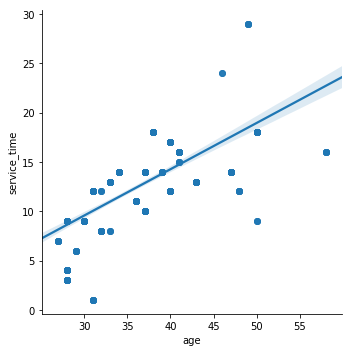

In [12]:
# From the above heatmap we can obeserve the strong correlated atributes
# Positive : [age,service_time] , [body_mass_index,service_time], [body_mas_index, age], [pet, transportation_expense]
# Negative : [hit_target, month_of_absense], [pet, service_time], [disciplinary_failure, reason_for_absense]
# Plotting the above attributes

sns.lmplot(x='age', y='service_time', data=df, fit_reg=True)


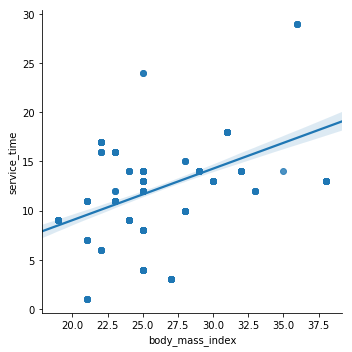

In [13]:

sns.lmplot(x='body_mass_index', y='service_time', data=df, fit_reg=True)


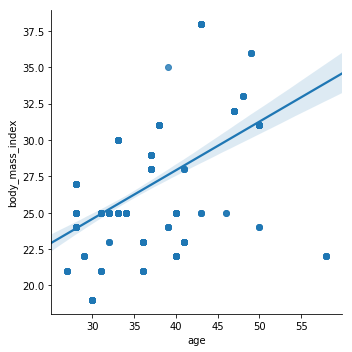

In [14]:
sns.lmplot(x='age', y='body_mass_index', data=df, fit_reg=True)


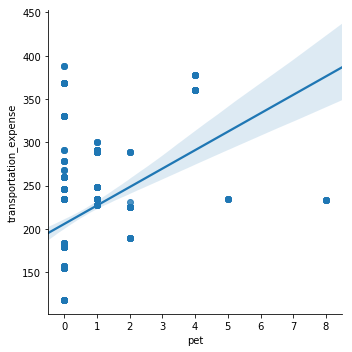

In [15]:
sns.lmplot(x='pet', y='transportation_expense', data=df, fit_reg=True)


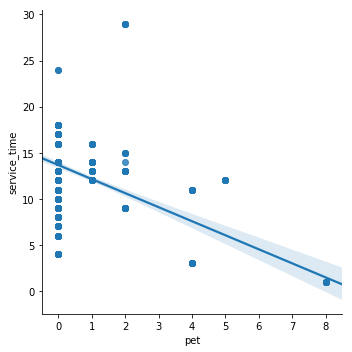

In [16]:
sns.lmplot(x='pet', y='service_time', data=df, fit_reg=True)

In [17]:
Y = df[['absenteeism_time_in_hours']]
X = df.drop(['absenteeism_time_in_hours'], axis=1)

In [18]:
# Min Max Scaler is used after an heuristic approach. It was choosen as it exhibited higher accuracy than it's counter parts.

# Feature Scaling
#x = X.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#X = pd.DataFrame(x_scaled,columns=list(X.columns))

X.describe()

,id,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,hit_target,disciplinary_failure,education,son,...,month_of_absence_8,month_of_absence_9,month_of_absence_10,month_of_absence_11,month_of_absence_12,day_of_the_week_2,day_of_the_week_3,day_of_the_week_4,day_of_the_week_5,day_of_the_week_6
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,...,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,17.995769,221.629055,29.827927,12.535966,36.342736,271.367897,94.585331,0.056417,1.300423,1.000000,...,0.074753,0.070522,0.098731,0.084626,0.063470,0.207334,0.205924,0.212976,0.176305,0.197461
std,11.075561,66.590466,14.854901,4.431897,6.402652,39.035220,3.745447,0.230889,0.681691,1.096991,...,0.263178,0.256205,0.298511,0.278521,0.243978,0.405683,0.404661,0.409700,0.381348,0.398364
min,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.000000,260.000000,50.000000,16.000000,40.000000,284.853000,97.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,36.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# Splitting data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)
print( "\nX_train:\n")
print( X_train.shape)
X_train.head()


X_train:

(496, 63)


,id,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,hit_target,disciplinary_failure,education,son,...,month_of_absence_8,month_of_absence_9,month_of_absence_10,month_of_absence_11,month_of_absence_12,day_of_the_week_2,day_of_the_week_3,day_of_the_week_4,day_of_the_week_5,day_of_the_week_6
174,28,225,26,9,28,343.253,95,0,1,1,...,0,0,0,0,0,1,0,0,0,0
89,33,248,25,14,47,306.345,93,0,1,2,...,0,0,0,1,0,1,0,0,0,0
262,24,246,25,16,41,294.217,81,0,1,0,...,0,1,0,0,0,1,0,0,0,0
55,13,369,17,12,31,241.476,92,1,1,3,...,0,1,0,0,0,0,0,1,0,0
575,3,179,51,18,38,264.249,97,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
print( "\nX_test:\n")
print( X_test.shape)
X_test.head()


X_test:

(213, 63)


,id,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,hit_target,disciplinary_failure,education,son,...,month_of_absence_8,month_of_absence_9,month_of_absence_10,month_of_absence_11,month_of_absence_12,day_of_the_week_2,day_of_the_week_3,day_of_the_week_4,day_of_the_week_5,day_of_the_week_6
599,33,248,25,14,47,222.196,99,0,1,2,...,0,0,0,0,0,0,1,0,0,0
290,5,235,20,13,43,265.017,88,0,1,1,...,0,0,1,0,0,1,0,0,0,0
101,28,225,26,9,28,261.306,97,0,1,1,...,0,0,0,0,1,0,1,0,0,0
60,34,118,10,10,37,253.465,93,0,1,0,...,0,0,1,0,0,0,1,0,0,0
359,3,179,51,18,38,251.818,96,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [22]:
Y_pred = lr.predict(X_test)

RMSE = np.sqrt(mean_squared_error(Y_pred, Y_test))
print(RMSE)

3.9902491392420387


In [24]:
rfe = RFE(lr, 10)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [False False False False False False False  True False False False False
 False False False False False False  True False  True  True False False
 False False False  True  True False  True  True False False False  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
Feature Ranking: [49 54 51 53 48 52 46  1 47 44 42 45 43 50 33 35 36 34  1  4  1  1 15 10
  8  5 14  1  1 12  1  1 13  2 20  1  9  1 11  6 18  3 16  7 19 17 21 25
 31 32 24 30 28 27 29 26 23 22 38 40 41 39 37]


C:\Users\samarth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
